# Математические пакеты. Лабораторная работа №2

Цель работы – практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

## Задачи
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import spectrogram
from scipy.io.wavfile import write, read
import numpy as np
import more_itertools as mit

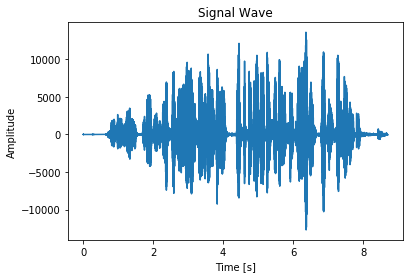

In [2]:
fd, signal = read("audio.wav", "r")
time = np.linspace(0, len(signal) / fd, num=len(signal))
plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(time, signal)
ipd.Audio('audio.wav')

### Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

In [3]:
dim = 2048
spectr_res = round(fd/dim)
overlap = 0.25

In [4]:
intervals = list(mit.windowed(signal, n=dim, step=int(overlap*dim)))
# В последнем отрезке возникли None, т.к не хватило элементов на шаг, уберем их
intervals[-1] = [i for i in intervals[-1] if i]
intervals = [i*np.hamming(len(i)) for i in intervals]

In [5]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [6]:
%%time
intervals = [DFT_slow(i) for i in intervals]

CPU times: user 5min 15s, sys: 8.78 s, total: 5min 24s
Wall time: 1min


In [7]:
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spec = np.array([i.real for i in amplitude_spec])

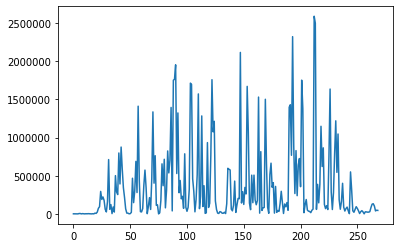

In [8]:
plt.plot(amplitude_spec)

In [9]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [10]:
F0 = []
for i in chunks(amplitude_spec, spectr_res):
    segment = np.array(i)
    if segment.max() > 3*segment.mean():            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]

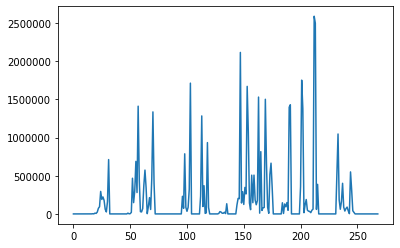

In [11]:
plt.plot(F0)

### Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса


In [44]:
F1 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > 2*inter_max:           
            F1 += [inter_max]
        else:
            F1 += [0]
    except:
        F1 += [0]
    i += 1

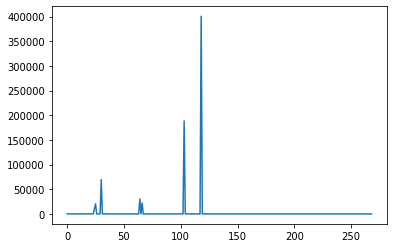

In [45]:
plt.plot(F1)

In [46]:
F2 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > 4*inter_max:           
            F2 += [inter_max]
        else:
            F2 += [0]
    except:
        F2 += [0]
    i += 1

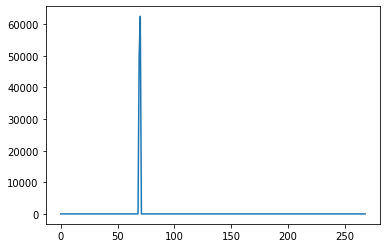

In [47]:
plt.plot(F2)

In [48]:
F3 = []
i = 0
while i < len(F0):
    try:
        inter_max = max([F0[4*i], F0[4*i-1], F0[4*i+1]])
        if F0[i] > 8*inter_max:           
            F3 += [inter_max]
        else:
            F3 += [0]
    except:
        F3 += [0]
    i += 1

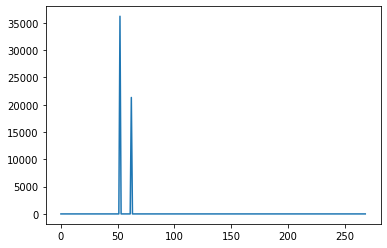

In [49]:
plt.plot(F3)

### Построить сонограмму по записи своего голоса.

In [9]:
import plotly.offline as pyo
from plotly.offline import init_notebook_mode 
import plotly.graph_objs as go
from scipy.signal import blackman

Audiodata = signal / (2.**15)

plt.figure()
N = 512 
w = blackman(N)
freqs, bins, Pxx = spectrogram(Audiodata, fd, window = w,nfft=N)

trace = [go.Heatmap(
    x= bins,
    y= freqs,
    z= 10*np.log10(Pxx),
    colorscale='Jet',
    )]
layout = go.Layout(
    title = 'Spectrogram',
    yaxis = dict(title = 'Frequency'),
    xaxis = dict(title = 'Time'),
    )
fig = go.Figure(data=trace, layout=layout)
pyo.iplot(fig, filename='Spectrogram')

<Figure size 432x288 with 0 Axes>